In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
# Define the paths
training_path = '/content/drive/MyDrive/Brain Tumor MRI Dataset/Training'
testing_path = '/content/drive/MyDrive/Brain Tumor MRI Dataset/Testing'

# Classes
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
# Function to count images in each class
def count_images_in_classes(base_path, classes):
    counts = {}
    for cls in classes:
        class_path = os.path.join(base_path, cls)
        counts[cls] = len(os.listdir(class_path))
    return counts



# Count images in training and testing sets

In [ ]:
training_counts = count_images_in_classes(training_path, classes)

In [ ]:
testing_counts = count_images_in_classes(testing_path, classes)

In [ ]:
print("Training set image counts:", training_counts)


Training set image counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}


In [ ]:
print("Testing set image counts:", testing_counts)

Testing set image counts: {'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}


In [ ]:
# Plotting the distribution
def plot_distribution(counts, title):
    plt.figure(figsize=(10, 5))
    plt.bar(counts.keys(), counts.values(), color=['blue', 'orange', 'green', 'red'])
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.title(title)
    plt.show()




# Plot distributions

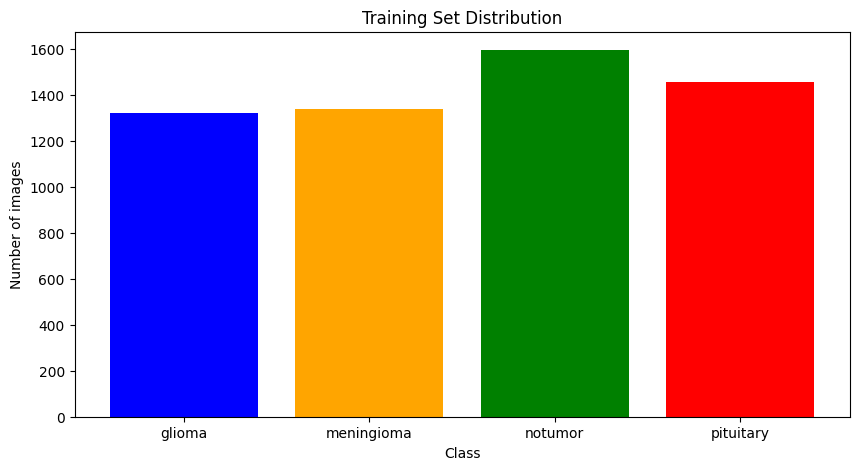

In [ ]:
plot_distribution(training_counts, 'Training Set Distribution')

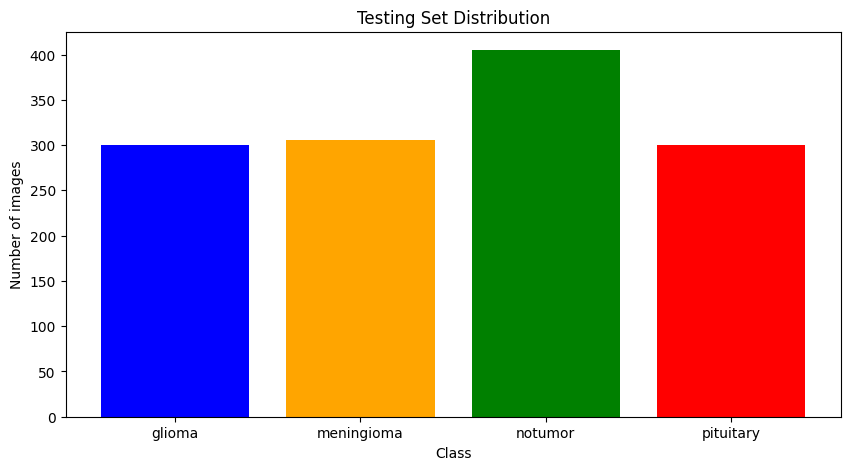

In [ ]:
plot_distribution(testing_counts, 'Testing Set Distribution')

In [ ]:
# Function to get image statistics
def get_image_stats(path):
    dimensions = []
    file_formats = []
    pixel_values = {cls: [] for cls in classes}

    for cls in classes:
        class_path = os.path.join(path, cls)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            with Image.open(img_path) as img:
                dimensions.append(img.size)
                file_formats.append(img.format)
                pixel_values[cls].extend(list(img.getdata()))

    return dimensions, file_formats, pixel_values

# Get stats for training set
train_dims, train_formats, train_pixels = get_image_stats(training_path)

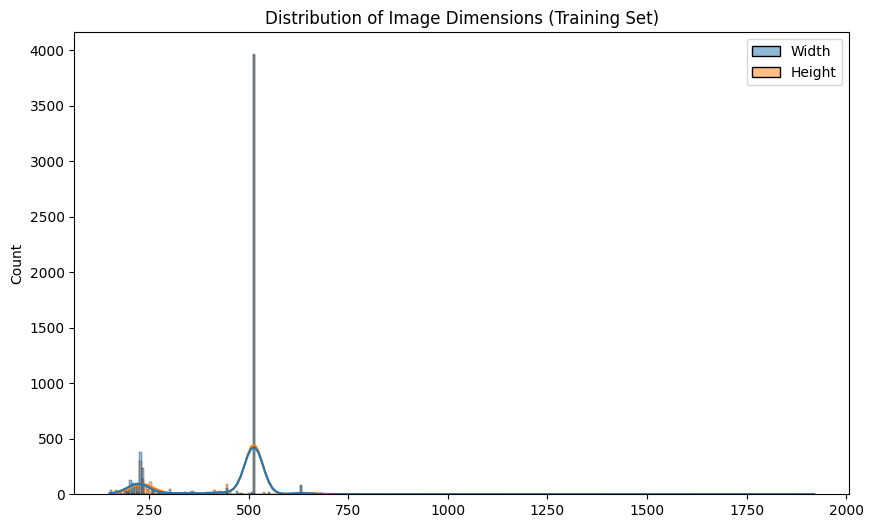

In [ ]:
# Analyze image dimensions
train_dims_df = pd.DataFrame(train_dims, columns=['Width', 'Height'])
plt.figure(figsize=(10, 6))
sns.histplot(train_dims_df, kde=True)
plt.title('Distribution of Image Dimensions (Training Set)')
plt.show()

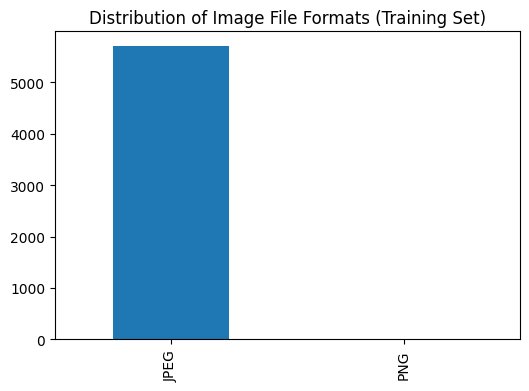

In [ ]:
# Analyze file formats
train_formats_df = pd.Series(train_formats).value_counts()
plt.figure(figsize=(6, 4))
train_formats_df.plot(kind='bar')
plt.title('Distribution of Image File Formats (Training Set)')
plt.show()